<a href="https://colab.research.google.com/github/maxmigue/linearRegression/blob/main/Tarea_Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

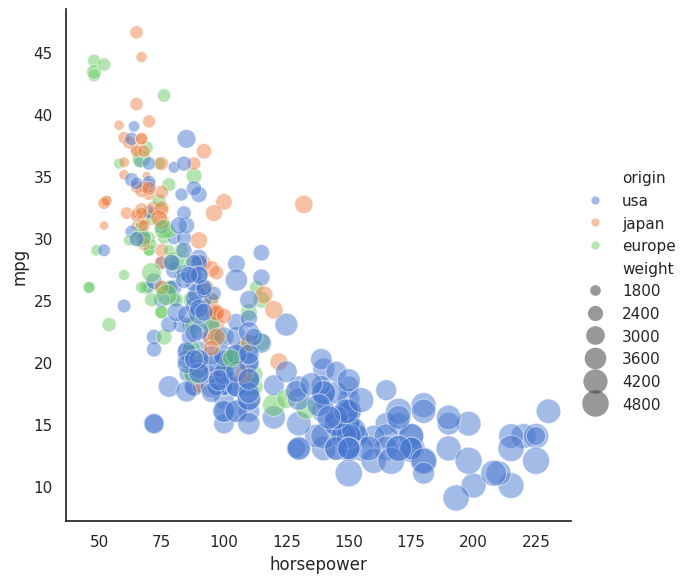

In [ ]:
import seaborn as sns
sns.set_theme(style="white")

# Carga del dataset
mpg = sns.load_dataset("mpg")

# Gráfico de dispersión entre caballos de fuerza y millas por galón
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos

<Axes: >

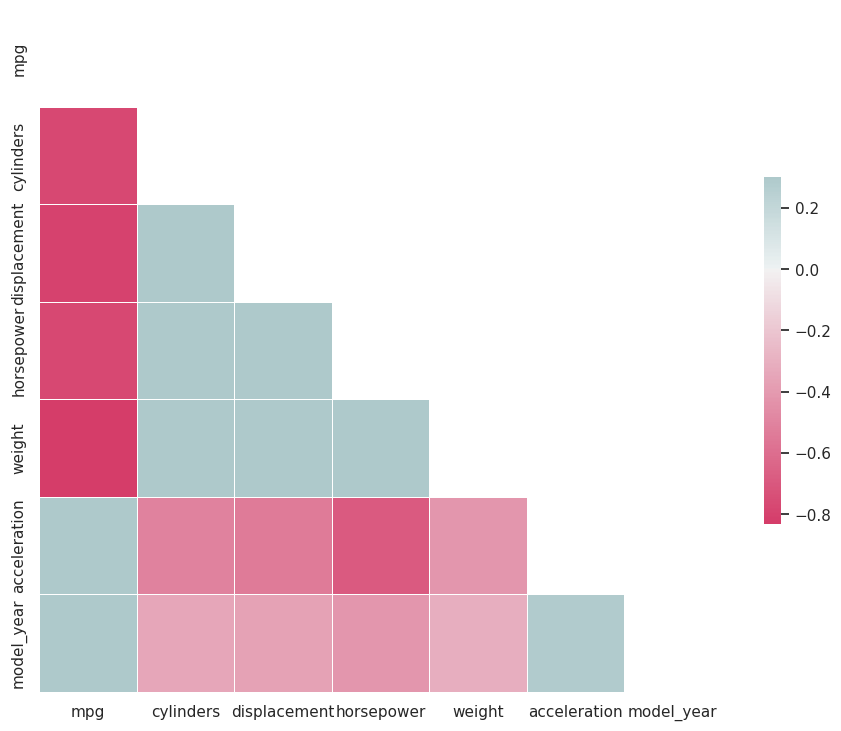

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Matriz de correlación solo con elementos numéricos
corr = mpg.select_dtypes(include=['number']).corr()


# Máscara para mostrar solo los elementos inferiores, ya que es igual a los
# elementos del triángulo superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configuración de espacio del trazado que se realizará
f, ax = plt.subplots(figsize=(11, 9))

# Se genera una paleta de color aleatorio para el mapa de calor
cmap = sns.diverging_palette(360, 200, as_cmap=True)

# Dibujo de mapa de correlación
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Preparación de datos
X = mpg[['horsepower']]  # Feature (horsepower)
y = mpg[['mpg']]  # Target (mpg)

# Separación de datos para entrenamiento y para pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rellena datos Nan con la media
imputer = SimpleImputer(strategy='mean')

X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
y_train = pd.DataFrame(imputer.fit_transform(y_train), columns=y_train.columns)
y_test = pd.DataFrame(imputer.transform(y_test), columns=y_test.columns)


# Creación de modelo de regresión
model = LinearRegression()

# Entrenamiento de modelo
model.fit(X_train, y_train)





LinearRegression()

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)

# Evalúa el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 19.172981359089114
R-squared: 0.6434024640305672


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


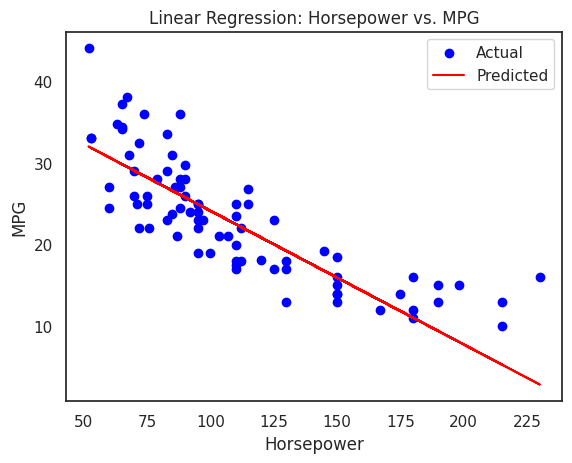

In [ ]:
# Grafica de linea recta entre variables con correlacion negativa -0.8  (Horsepower vs mpg)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Regresión lineal: Horsepower vs. MPG')
plt.legend()
plt.show()

6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.